# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Harits Mughni Zakinu
- **Email:** haritsmzakinu@gmail.com
- **ID Dicoding:** harits_mughni_zakinu

## Menentukan Pertanyaan Bisnis

| NO  | PERTANYAAN BISNIS                                                                |
|-----|-------------------------------------------------------------------------------------|
| 1.  | Bagaimana performa penjualan dan revenue perusahaan dalam 6 bulan terakhir?  |
| 2.  | Produk dengan kategori apa yang paling banyak dan paling sedikit terjual? |
| 3.  | Produk dengan kategori apa yang mendapat skor ulasan tertinggi dan terendah? |
| 4.  | Bagaimana distribusi lokasi Pelanggan dan Penjual? |
| 5.  | Apa metode pembayaran yang paling sering digunakan? |
| 6.  | Kapan terakhir pelanggan melakukan transaksi? |
| 7.  | Seberapa sering seorang pelanggan melakukan pembelian? |
| 8.  | Berapa rata-rata banyak uang yang dihabiskan pelanggan? |

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import datetime as dt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Wrangling

### Gathering Data

In [3]:
# Load the datasets
customers_df = pd.read_csv('/content/drive/MyDrive/Proyek Analisis Data (Dicoding)/customers_dataset.csv')
orders_df = pd.read_csv('/content/drive/MyDrive/Proyek Analisis Data (Dicoding)/orders_dataset.csv')
items_df = pd.read_csv('/content/drive/MyDrive/Proyek Analisis Data (Dicoding)/order_items_dataset.csv')
payments_df = pd.read_csv('/content/drive/MyDrive/Proyek Analisis Data (Dicoding)/order_payments_dataset.csv')
reviews_df = pd.read_csv('/content/drive/MyDrive/Proyek Analisis Data (Dicoding)/order_reviews_dataset.csv')
products_df = pd.read_csv('/content/drive/MyDrive/Proyek Analisis Data (Dicoding)/products_dataset.csv')
sellers_df = pd.read_csv('/content/drive/MyDrive/Proyek Analisis Data (Dicoding)/sellers_dataset.csv')
category_translation_df = pd.read_csv('/content/drive/MyDrive/Proyek Analisis Data (Dicoding)/product_category_name_translation.csv')

In [4]:
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [5]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [6]:
items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [7]:
payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [8]:
reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [9]:
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [10]:
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [11]:
category_translation_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


### Assessing Data

In [12]:
datasets = [customers_df, orders_df, items_df, payments_df, reviews_df, products_df, sellers_df, category_translation_df]
titles = ['customers', 'orders', 'items', 'payments', 'reviews', 'products', 'sellers', 'category_translation']

data_summary = pd.DataFrame({},)
data_summary['DATASET']= titles
data_summary['KOLOM'] = [', '.join([col for col, null in data.isnull().sum().items() ]) for data in datasets]
data_summary['TOTAL BARIS']= [data.shape[0] for data in datasets]
data_summary['TOTAL KOLOM']= [data.shape[1] for data in datasets]
data_summary['TOTAL DUPLIKAT']= [len(data[data.duplicated()]) for data in datasets]
data_summary['TOTAL NILAI KOSONG']= [data.isnull().sum().sum() for data in datasets]
data_summary['KOLOM DENGAN MISSING VALUE'] = [', '.join([col for col, null in data.isnull().sum().items() if null > 0]) for data in datasets]
data_summary.style.background_gradient(cmap='BuPu')

,DATASET,KOLOM,TOTAL BARIS,TOTAL KOLOM,TOTAL DUPLIKAT,TOTAL NILAI KOSONG,KOLOM DENGAN MISSING VALUE
0,customers,"customer_id, customer_unique_id, customer_zip_code_prefix, customer_city, customer_state",99441,5,0,0,
1,orders,"order_id, customer_id, order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date",99441,8,0,4908,"order_approved_at, order_delivered_carrier_date, order_delivered_customer_date"
2,items,"order_id, order_item_id, product_id, seller_id, shipping_limit_date, price, freight_value",112650,7,0,0,
3,payments,"order_id, payment_sequential, payment_type, payment_installments, payment_value",103886,5,0,0,
4,reviews,"review_id, order_id, review_score, review_comment_title, review_comment_message, review_creation_date, review_answer_timestamp",99224,7,0,145903,"review_comment_title, review_comment_message"
5,products,"product_id, product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm",32951,9,0,2448,"product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm"
6,sellers,"seller_id, seller_zip_code_prefix, seller_city, seller_state",3095,4,0,0,
7,category_translation,"product_category_name, product_category_name_english",71,2,0,0,


**Insight:**
1. **Dataset `reviews` memiliki jumlah data kosong tertinggi**:
   - Kolom yang memiliki data kosong adalah `review_comment_title`, dan `review_comment_message` dengan total 145.903 data yang kosong.

2. **Dataset `orders` memiliki jumlah data kosong tertinggi kedua**:
   - Kolom yang memiliki data kosong adalah `order_approved_at`, `order_delivered_carrier_date`, dan `order_delivered_customer_date` dengan total 4.908 data yang kosong.

3. **Dataset `products` juga memiliki data kosong yang signifikan**:
   - Kolom yang mengandung missing values adalah `product_category_name` dan atribut dimensi produk (`product_length_cm`, `product_height_cm`, `product_width_cm`) dengan total 2.448 data kosong.

4. **Tidak ada data duplikat dalam semua dataset**:

5. **Beberapa dataset kecil, seperti `category_translation` dan `sellers`, memiliki informasi yang cukup terbatas**:
   - Dataset `category_translation` hanya memiliki 71 baris dan dua kolom, yang mungkin digunakan untuk mencocokkan nama kategori produk dengan terjemahannya.
   - Dataset `sellers` memiliki 3.095 baris dengan informasi yang cukup penting terkait penjual, tetapi tidak ada data kosong atau duplikat.

6. **Dataset `customers` bersih tanpa data kosong**:
   - Semua 99.441 baris data di dataset ini memiliki data yang lengkap, sehingga tidak diperlukan penanganan khusus untuk missing values pada dataset ini.

#### Assessing Customers Table

In [13]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


**Insight:**
- Terdapat *invalid data type* pada kolom `customer_zip_code_prefix`


#### Assessing Orders Table

In [14]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


**Insight:**
- Terdapat 5 *invalid data type* mulai dari kolom `order_purchase_timestamp` sampai `order_estimated_delivery_date`

#### Assessing Items Table

In [15]:
items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


**Insight:**
- Terdapat *invalid data type* pada kolom `order_item_id`

In [16]:
# Cek nilai duplikat pada order lines
order_lines_duplicate = items_df[["order_id", "product_id"]].duplicated().sum()
print(f"Total duplicate value in order lines: {order_lines_duplicate}")

Total duplicate value in order lines: 10225


**Catatan! Struktur `items_df` tidak menggunakan jumlah pesanan, tetapi *order lines* berulang untuk setiap produk. Jadi, kita perlu menghitung jumlah total setiap produk yang dipesan.**

In [17]:
# Cek statistik dari tabel items
items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


<Axes: xlabel='price'>

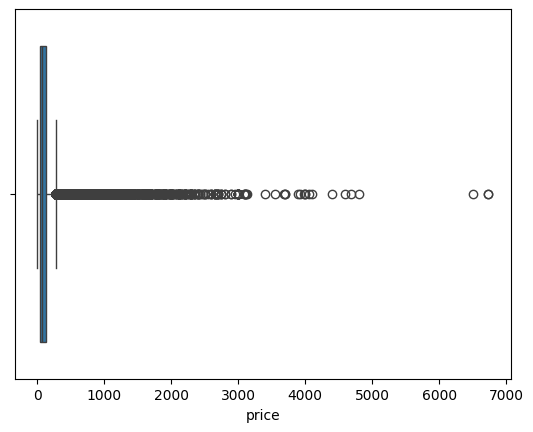

In [18]:
# Boxplot untuk mengecek outlier pada kolom price
sns.boxplot(x=items_df["price"])

<Axes: xlabel='freight_value'>

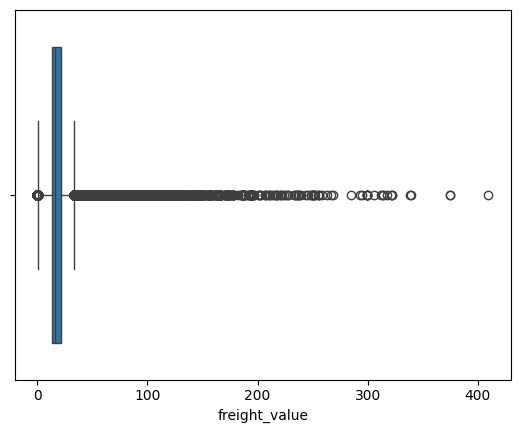

In [19]:
# Boxplot untuk mengecek outlier pada kolom freight
sns.boxplot(x=items_df["freight_value"])

**Insight:**
- Terdapat *inaccurate value* pada kolom `price` dan `freight_value`

#### Assessing Payments Table

In [20]:
payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [21]:
payments_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


<Axes: xlabel='payment_value'>

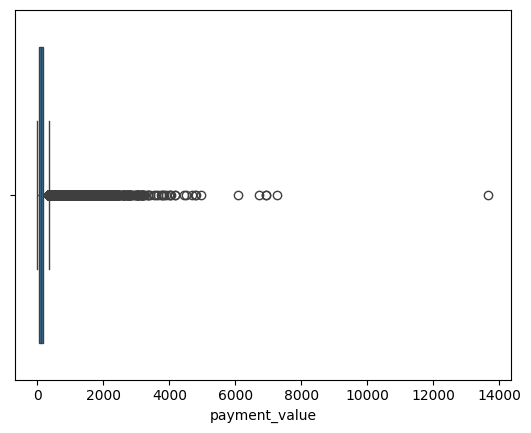

In [22]:
# Boxplot untuk mengecek outlier pada kolom payment_value
sns.boxplot(x=payments_df["payment_value"])

**Insight:**
- Terdapat *inaccurate value* pada kolom `payment_value`.

#### Assessing Reviews Table

In [23]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [24]:
reviews_df.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


**Insight:**
- Tidak terdapat *invalid data type* dan *inaccurate value*

#### Assessing Products Table

In [25]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


**Catatan: Kita akan mengecek kolom dengan tipe data `float` apakah ada nilai desimal atau tidak. Jika ada nilai desimal maka berarti tipe data sudah benar namun jika tidak maka terdapat `invalid data type`.**

In [26]:
# Daftar nama kolom yang akan dicek
columns_to_check = [
    "product_name_lenght",
    "product_description_lenght",
    "product_photos_qty",
    "product_weight_g",
    "product_length_cm",
    "product_height_cm",
    "product_width_cm"
]

# Melakukan loop untuk setiap kolom dan mengecek apakah terdapat nilai desimal
for col in columns_to_check:
    has_decimal = products_df[col].apply(lambda x: x != round(x) if pd.notnull(x) else False).any()
    if has_decimal:
        print(f"Kolom '{col}' memiliki nilai desimal.")
    else:
        print(f"Kolom '{col}' tidak memiliki nilai desimal.")

Kolom 'product_name_lenght' tidak memiliki nilai desimal.
Kolom 'product_description_lenght' tidak memiliki nilai desimal.
Kolom 'product_photos_qty' tidak memiliki nilai desimal.
Kolom 'product_weight_g' tidak memiliki nilai desimal.
Kolom 'product_length_cm' tidak memiliki nilai desimal.
Kolom 'product_height_cm' tidak memiliki nilai desimal.
Kolom 'product_width_cm' tidak memiliki nilai desimal.


In [27]:
# Cek statistik kolom products_df
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


**Insight:**
- Terdapat 7 kolom dengan *invalid data type*

#### Assessing Sellers Table

In [28]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [29]:
# Cek statistik seller_df
sellers_df.describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


**Insight:**
- Terdapat *invalid data type* pada kolom `seller_zip_code_prefix`.

#### Assessing Category Translation Table

In [30]:
category_translation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [31]:
# Cek statistik category_translation_df
category_translation_df.describe()

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


**Insight:**
- Tidak ada *invalid data type* maupun *inaccurate value*

### Cleaning Data

#### Cleaning Customer Table

**Handling Format Data Type**

In [32]:
# Ubah atribut customer_zip_code_prefix menjadi tipe data string
customers_df["customer_zip_code_prefix"] = customers_df[
    "customer_zip_code_prefix"
].astype(str)

# Periksa tipe data dari atribut customer_zip_code_prefix
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  object
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: object(5)
memory usage: 3.8+ MB


#### Cleaning Orders Table

**Handling Format Data Type**

In [33]:
# Daftar kolom yang ingin diubah ke tipe datetime
columns_to_convert = [
    "order_purchase_timestamp",
    "order_approved_at",
    "order_delivered_carrier_date",
    "order_delivered_customer_date",
    "order_estimated_delivery_date"
]

# Ubah setiap kolom dalam daftar menjadi tipe datetime
for column in columns_to_convert:
    orders_df[column] = pd.to_datetime(orders_df[column])

# Periksa tipe data dari atribut
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


**Handling Missing Value**

In [34]:
orders_df.isnull().sum().sort_values(ascending=False)

,0
order_delivered_customer_date,2965
order_delivered_carrier_date,1783
order_approved_at,160
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_estimated_delivery_date,0


In [35]:
# Tiga nilai pertama pada "order_delivered_customer_date" kosong. Jadi, kita akan menghapusnya sebelum menggunakan metode ffill()
orders_df.drop(orders_df.index[:3], inplace=True)

# Reset indeks
orders_df.reset_index(drop=True, inplace=True)

In [36]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
1,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26
2,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01
3,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09
4,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07


In [37]:
# Gantikan nilai yang hilang dengan nilai sebelumnya (forward fill):
orders_df["order_delivered_customer_date"] = orders_df[
    "order_delivered_customer_date"
].ffill()

# Periksa nilai yang hilang lagi
print("Nilai yang hilang: ", orders_df["order_delivered_customer_date"].isnull().sum())

Nilai yang hilang:  0


In [38]:
# Menambahkan kolom dengan tanggal pesanan ordinal
orders_df["date_ordinal"] = orders_df["order_purchase_timestamp"].apply(
    lambda date: date.toordinal()
)

In [39]:
# Daftar kolom yang ingin diubah ke tipe datetime
date_columns = [
    "order_estimated_delivery_date",
    "order_delivered_customer_date",
    "order_purchase_timestamp"
]

# Ubah setiap kolom dalam daftar menjadi tipe datetime
for column in date_columns:
    orders_df[column] = pd.to_datetime(orders_df[column])

# Buat kolom shipping_time, yang merupakan selisih antara tanggal perkiraan pengiriman dan tanggal pengiriman pelanggan
orders_df["shipping_time"] = orders_df["order_estimated_delivery_date"] - orders_df["order_delivered_customer_date"]

# Buat kolom shipping_duration, yang merupakan selisih antara tanggal pengiriman pelanggan dan tanggal pembelian
orders_df["shipping_duration"] = orders_df["order_delivered_customer_date"] - orders_df["order_purchase_timestamp"]

# Buat kolom estimated_duration, yang merupakan selisih antara tanggal perkiraan pengiriman dan tanggal pembelian
orders_df["estimated_duration"] = orders_df["order_estimated_delivery_date"] - orders_df["order_purchase_timestamp"]

# Ambil hanya jumlah hari dari kolom durasi yang telah dibuat
orders_df["shipping_time"] = orders_df["shipping_time"].dt.days
orders_df["shipping_duration_days"] = orders_df["shipping_duration"].dt.days
orders_df["estimated_duration_days"] = orders_df["estimated_duration"].dt.days

In [40]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,date_ordinal,shipping_time,shipping_duration,estimated_duration,shipping_duration_days,estimated_duration_days
0,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,736651,12,13 days 05:00:36,26 days 04:31:54,13,26
1,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,736738,9,2 days 20:58:23,12 days 02:41:21,2,12
2,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01,736519,5,16 days 13:00:50,22 days 02:02:55,16,22
3,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,2017-07-26 10:57:55,2017-05-09,736430,-79,105 days 22:35:47,27 days 11:37:52,105,27
4,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07,736465,11,9 days 23:45:21,21 days 10:49:30,9,21


#### Cleaning Items Table

**Handling Format Data Type**

In [41]:
# Ubah order_item_id ke tipe data object
items_df["order_item_id"] = items_df["order_item_id"].astype(str)

items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  object 
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), object(5)
memory usage: 6.0+ MB


**Handling Outlier**

In [42]:
# Menangani outlier pada atribut harga
# Hitung Q1, Q3, dan IQR
Q1 = items_df["price"].quantile(0.25)
Q3 = items_df["price"].quantile(0.75)
IQR = Q3 - Q1

# Tentukan batas untuk rentang yang dapat diterima
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Hapus baris dengan 'price' di luar rentang yang dapat diterima
items_df = items_df[
    (items_df["price"] >= lower_bound) & (items_df["price"] <= upper_bound)
]

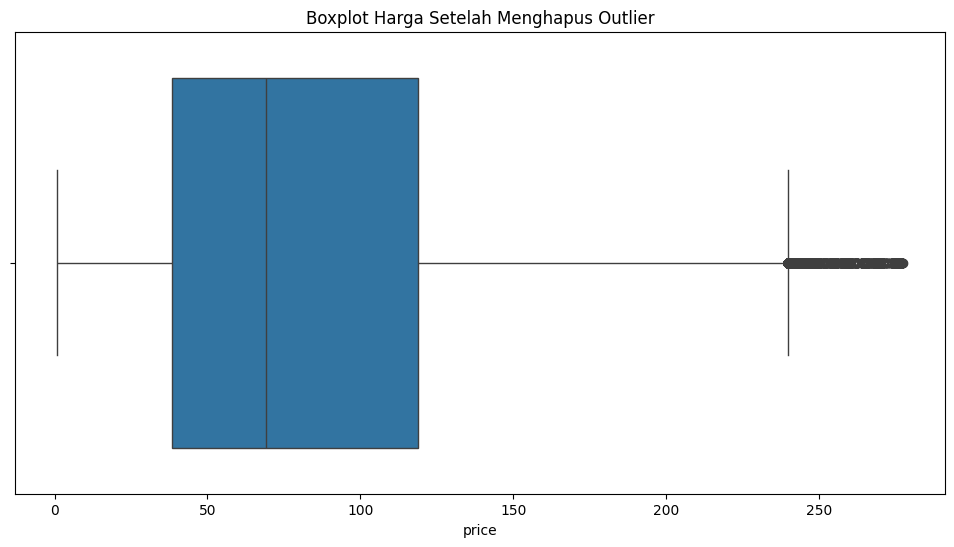

In [43]:
# Periksa boxplot atribut harga setelah menghapus outlier
plt.figure(figsize=(12, 6))
sns.boxplot(x=items_df["price"])
plt.title("Boxplot Harga Setelah Menghapus Outlier")
plt.show()

In [44]:
items_df["price"].describe()

,price
count,104223.000000
mean,83.974668
std,58.580002
min,0.850000
25%,38.500000
50%,69.000000
75%,118.990000
max,277.300000


In [45]:
# Menangani outlier pada atribut nilai pengiriman (freight_value)
# Hitung Q1, Q3, dan IQR
Q1 = items_df["freight_value"].quantile(0.25)
Q3 = items_df["freight_value"].quantile(0.75)
IQR = Q3 - Q1

# Tentukan batas untuk rentang yang dapat diterima
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Hapus baris dengan 'freight_value' di luar rentang yang dapat diterima
items_df = items_df[
    (items_df["freight_value"] >= lower_bound)
    & (items_df["freight_value"] <= upper_bound)
]


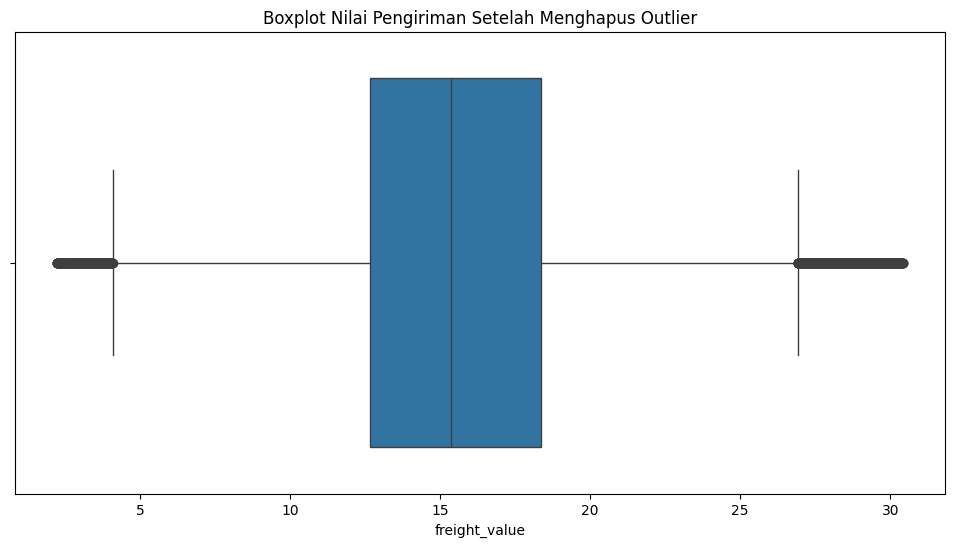

In [46]:
# Periksa boxplot atribut nilai pengiriman (freight_value) setelah menghapus outlier
plt.figure(figsize=(12, 6))
sns.boxplot(x=items_df["freight_value"])
plt.title("Boxplot Nilai Pengiriman Setelah Menghapus Outlier")
plt.show()

In [47]:
items_df["freight_value"].describe()

,freight_value
count,93975.000000
mean,15.751864
std,5.113773
min,2.240000
25%,12.660000
50%,15.350000
75%,18.370000
max,30.410000


**Transform the order_item_id into qty to extract unit-per-order line profile**

In [48]:
items_df = (
    items_df.groupby(by=["product_id", "order_id"])
    .agg({"order_item_id": "count",
          "seller_id": "first",
          "shipping_limit_date": "first",
          "price": "first", "freight_value": "first",
        })
    .reset_index()
    )

items_df

,product_id,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value
0,00066f42aeeb9f3007548bb9d3f33c38,f30149f4a8882a08895b6a242aa0d612,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-05-24 18:58:59,101.65,18.59
1,00088930e925c41fd95ebfe695fd2655,f5eda0ded77c1293b04c953138c8331d,1,7142540dd4c91e2237acb7e911c4eba2,2017-12-18 19:32:19,129.90,13.93
2,0009406fd7479715e4bef61dd91f2462,0bf736fd0fd5169d60de3699fcbcf986,1,4a3ca9315b744ce9f8e9374361493884,2017-12-29 16:12:36,229.00,13.10
3,000b8f95fcb9e0096488278317764d19,3aba44d8e554ab4bb8c09f6f78032ca8,1,40ec8ab6cdafbcc4f544da38c67da39a,2018-08-16 13:35:21,58.90,19.60
4,000b8f95fcb9e0096488278317764d19,6f0dfb5b5398b271cc6bbd9ee263530e,1,40ec8ab6cdafbcc4f544da38c67da39a,2018-08-07 22:15:19,58.90,19.60
...,...,...,...,...,...,...,...
85049,fffdb2d0ec8d6a61f0a0a0db3f25b441,2878b4e373a9556df9aa1708a4e5c3c8,1,9f505651f4a6abe901a56cdc21508025,2018-08-09 16:55:38,34.99,7.51
85050,fffdb2d0ec8d6a61f0a0a0db3f25b441,a8159270bc9cf7d54450e079ba6b7232,1,9f505651f4a6abe901a56cdc21508025,2018-04-09 05:35:27,29.99,18.23
85051,fffdb2d0ec8d6a61f0a0a0db3f25b441,beaf95465b542dea76df78b2fb86a97a,1,9f505651f4a6abe901a56cdc21508025,2018-04-25 10:30:35,34.99,18.23
85052,fffdb2d0ec8d6a61f0a0a0db3f25b441,d6c1ed12e8eeaa15e9d5c83c79598f85,1,9f505651f4a6abe901a56cdc21508025,2018-08-14 17:25:18,34.99,7.51


In [49]:
items_df.rename(columns={"order_item_id": "qty"}, inplace=True)
items_df

,product_id,order_id,qty,seller_id,shipping_limit_date,price,freight_value
0,00066f42aeeb9f3007548bb9d3f33c38,f30149f4a8882a08895b6a242aa0d612,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-05-24 18:58:59,101.65,18.59
1,00088930e925c41fd95ebfe695fd2655,f5eda0ded77c1293b04c953138c8331d,1,7142540dd4c91e2237acb7e911c4eba2,2017-12-18 19:32:19,129.90,13.93
2,0009406fd7479715e4bef61dd91f2462,0bf736fd0fd5169d60de3699fcbcf986,1,4a3ca9315b744ce9f8e9374361493884,2017-12-29 16:12:36,229.00,13.10
3,000b8f95fcb9e0096488278317764d19,3aba44d8e554ab4bb8c09f6f78032ca8,1,40ec8ab6cdafbcc4f544da38c67da39a,2018-08-16 13:35:21,58.90,19.60
4,000b8f95fcb9e0096488278317764d19,6f0dfb5b5398b271cc6bbd9ee263530e,1,40ec8ab6cdafbcc4f544da38c67da39a,2018-08-07 22:15:19,58.90,19.60
...,...,...,...,...,...,...,...
85049,fffdb2d0ec8d6a61f0a0a0db3f25b441,2878b4e373a9556df9aa1708a4e5c3c8,1,9f505651f4a6abe901a56cdc21508025,2018-08-09 16:55:38,34.99,7.51
85050,fffdb2d0ec8d6a61f0a0a0db3f25b441,a8159270bc9cf7d54450e079ba6b7232,1,9f505651f4a6abe901a56cdc21508025,2018-04-09 05:35:27,29.99,18.23
85051,fffdb2d0ec8d6a61f0a0a0db3f25b441,beaf95465b542dea76df78b2fb86a97a,1,9f505651f4a6abe901a56cdc21508025,2018-04-25 10:30:35,34.99,18.23
85052,fffdb2d0ec8d6a61f0a0a0db3f25b441,d6c1ed12e8eeaa15e9d5c83c79598f85,1,9f505651f4a6abe901a56cdc21508025,2018-08-14 17:25:18,34.99,7.51


#### Cleaning Payment Table

**Handling Outlier**

In [50]:
# Menangani outlier pada atribut nilai pembayaran (payment_value)
# Hitung Q1, Q3, dan IQR
Q1 = payments_df["payment_value"].quantile(0.25)
Q3 = payments_df["payment_value"].quantile(0.75)
IQR = Q3 - Q1

# Tentukan batas untuk rentang yang dapat diterima
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Hapus baris dengan 'payment_value' di luar rentang yang dapat diterima
order_payments_df = payments_df[
    (payments_df["payment_value"] >= lower_bound)
    & (payments_df["payment_value"] <= upper_bound)
]

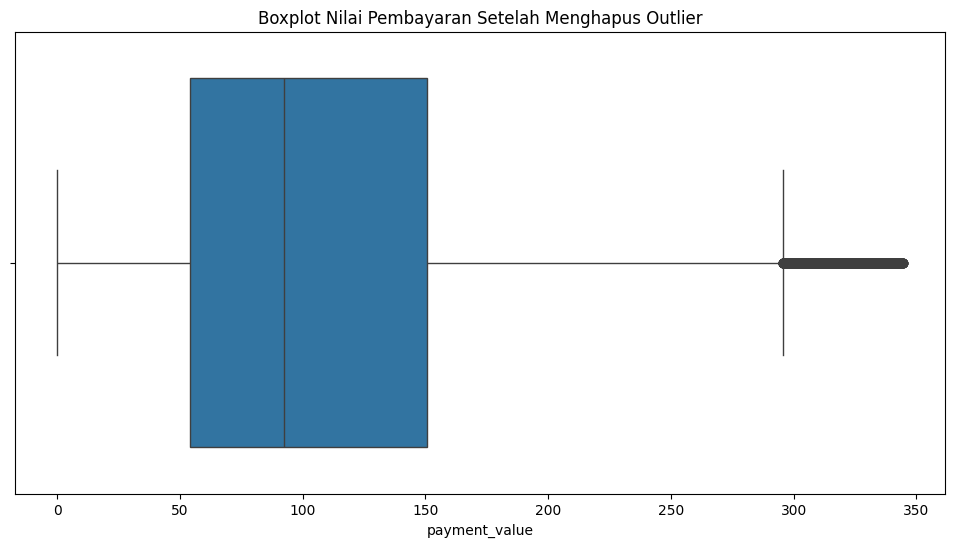

In [51]:
# Buat boxplot atribut nilai pembayaran (payment_value) setelah menghapus outlier
plt.figure(figsize=(12, 6))
sns.boxplot(x=order_payments_df["payment_value"])
plt.title("Boxplot Nilai Pembayaran Setelah Menghapus Outlier")
plt.show()

#### Cleaning Reviews Table

**Handling Format Data Type**

In [52]:
# Ubah atribut review_creation_date menjadi tipe datetime
reviews_df["review_creation_date"] = pd.to_datetime(
    reviews_df["review_creation_date"])

# Ubah atribut review_answer_timestamp menjadi tipe datetime
reviews_df["review_answer_timestamp"] = pd.to_datetime(
    reviews_df["review_answer_timestamp"])

# Periksa tipe data dari atribut
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


**Handling Missing Value**

In [53]:
reviews_df.isnull().sum().sort_values(ascending=False)

,0
review_comment_title,87656
review_comment_message,58247
review_id,0
order_id,0
review_score,0
review_creation_date,0
review_answer_timestamp,0


In [54]:
# Isi nilai yang hilang di review_comment_title dengan "No comment title"
reviews_df["review_comment_title"].fillna("No comment title", inplace=True)

# Isi nilai yang hilang di review_comment_message dengan "No comment"
reviews_df["review_comment_message"].fillna("No comment", inplace=True)

# Periksa nilai yang hilang lagi
reviews_df.isnull().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,0
review_comment_message,0
review_creation_date,0
review_answer_timestamp,0


#### Cleaning Products Table

**Handling Incorrect Column Name**

In [55]:
# Ubah product_name_lenght ke product_name_length
products_df.rename(columns={"product_name_lenght": "product_name_length"}, inplace=True)
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_length         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [56]:
# Ubah product_name_lenght attribute ke product_name_length
products_df.rename(columns={"product_description_lenght": "product_description_length"},
                   inplace=True
)
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_length         32341 non-null  float64
 3   product_description_length  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


**Handling Missing Value**

In [57]:
products_df.isnull().sum().sort_values(ascending=False)

,0
product_category_name,610
product_name_length,610
product_description_length,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2
product_id,0


In [58]:
# Isi nilai yang hilang di product_category_name dengan modus
products_df["product_category_name"].fillna(products_df["product_category_name"].mode()[0], inplace=True)

In [59]:
# Daftar kolom yang akan diisi dengan median
columns_to_fill = [
    "product_name_length",
    "product_description_length",
    "product_photos_qty",
    "product_weight_g",
    "product_length_cm",
    "product_height_cm",
    "product_width_cm"
]

# Isi nilai yang hilang dengan median untuk setiap kolom dalam daftar
for column in columns_to_fill:
    products_df[column].fillna(products_df[column].median(), inplace=True)

print(f"Nilai yang hilang: {products_df.isnull().sum().sum()}")

Nilai yang hilang: 0


**Handling Format Data Type**

In [60]:
# Daftar kolom yang ingin diubah ke tipe int
columns_to_convert = [
    "product_name_length",
    "product_description_length",
    "product_photos_qty",
    "product_weight_g",
    "product_length_cm",
    "product_height_cm",
    "product_width_cm"
]

# Ubah setiap kolom dalam daftar menjadi tipe int
for column in columns_to_convert:
    products_df[column] = products_df[column].astype(int)

products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   product_id                  32951 non-null  object
 1   product_category_name       32951 non-null  object
 2   product_name_length         32951 non-null  int64 
 3   product_description_length  32951 non-null  int64 
 4   product_photos_qty          32951 non-null  int64 
 5   product_weight_g            32951 non-null  int64 
 6   product_length_cm           32951 non-null  int64 
 7   product_height_cm           32951 non-null  int64 
 8   product_width_cm            32951 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 2.3+ MB


In [61]:
products_df.head()

,product_id,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40,287,1,225,16,10,14
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44,276,1,1000,30,18,20
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46,250,1,154,18,9,15
3,cef67bcfe19066a932b7673e239eb23d,bebes,27,261,1,371,26,4,26
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37,402,4,625,20,17,13


#### Cleaning Sellers Table

**Handling Format Data Type**

In [62]:
# Ubah kolom seller_zip_code_prefix attribute ke tipe data object
sellers_df["seller_zip_code_prefix"] = sellers_df["seller_zip_code_prefix"].astype(str)

sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   object
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: object(4)
memory usage: 96.8+ KB


#### Merging All of the Dataframe

In [63]:
merged_df= pd.merge(customers_df, orders_df, on="customer_id")
merged_df= merged_df.merge(reviews_df, on="order_id")
merged_df= merged_df.merge(items_df, on="order_id")
merged_df= merged_df.merge(products_df, on="product_id")
merged_df= merged_df.merge(payments_df, on="order_id")
merged_df= merged_df.merge(sellers_df, on='seller_id')
merged_df= merged_df.merge(category_translation_df, on='product_category_name')
merged_df.shape

(88711, 46)

In [64]:
merged_df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_height_cm,product_width_cm,payment_sequential,payment_type,payment_installments,payment_value,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,64,31,1,credit_card,2,146.87,8577,itaquaquecetuba,SP,office_furniture
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,64,31,1,credit_card,1,275.79,8577,itaquaquecetuba,SP,office_furniture
2,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-19 20:16:31,...,64,31,1,credit_card,7,140.61,8577,itaquaquecetuba,SP,office_furniture
3,fd3a0b1bd209f0e7d420c9c3d1127613,567ab47ca4deb92d46dbf54dce07d0a7,88460,angelina,SC,574fe1739f65af76badd0999db300b4f,delivered,2017-03-23 15:10:17,2017-03-23 15:25:11,2017-03-28 18:23:51,...,64,31,1,credit_card,5,142.05,8577,itaquaquecetuba,SP,office_furniture
4,10558ef4afea173bfb5e2cbe3d5b0bb5,749943913a9851a39c9baf51877fbab6,78134,varzea grande,MT,eaae5bd20fb15d85aa673d9b7c0e8ca5,delivered,2017-03-18 23:04:36,2017-03-18 23:04:36,2017-03-28 06:29:47,...,64,31,1,credit_card,2,148.33,8577,itaquaquecetuba,SP,office_furniture
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88706,406c8e1382162dc6bef214e0c01fc297,9b8844d7cceb1277e6508cce966e4a09,6767,taboao da serra,SP,4cbf1cc60a2d1704a70e11ee8be1510a,delivered,2018-01-01 17:03:13,2018-01-01 17:11:48,2018-01-02 15:58:13,...,9,37,1,credit_card,2,130.03,89701,concordia,SC,la_cuisine
88707,3e46b833c6f5d7827700b8ef99db2e08,578035514ad8238fa724f24b4aabc1df,88705,tubarao,SC,fbd9022ebf9271e1952ca884a972d1bd,delivered,2017-07-22 17:55:13,2017-07-22 18:10:09,2017-07-24 18:28:01,...,9,37,1,credit_card,1,119.60,89701,concordia,SC,la_cuisine
88708,aa0533eb31ed3be79086f11bb2bec430,a490d5875edefe9bb8f5101ec2f6b56f,13870,sao joao da boa vista,SP,e22a3e8048469ea68906f666d446c25c,delivered,2017-08-28 09:48:01,2017-08-28 10:05:04,2017-08-29 11:05:28,...,12,15,1,credit_card,3,160.46,89701,concordia,SC,la_cuisine
88709,d11524bb77c28efad04e4467eac8a660,6968d41eb700f1ea39424e04b854bf7e,30130,belo horizonte,MG,1ce0acf125f1bcd636276dd213363196,delivered,2017-07-31 18:10:29,2017-07-31 18:25:20,2017-08-02 18:22:30,...,7,40,1,credit_card,2,55.18,89701,concordia,SC,la_cuisine


In [65]:
len(merged_df[merged_df.duplicated()])

0

In [66]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88711 entries, 0 to 88710
Data columns (total 46 columns):
 #   Column                         Non-Null Count  Dtype          
---  ------                         --------------  -----          
 0   customer_id                    88711 non-null  object         
 1   customer_unique_id             88711 non-null  object         
 2   customer_zip_code_prefix       88711 non-null  object         
 3   customer_city                  88711 non-null  object         
 4   customer_state                 88711 non-null  object         
 5   order_id                       88711 non-null  object         
 6   order_status                   88711 non-null  object         
 7   order_purchase_timestamp       88711 non-null  datetime64[ns] 
 8   order_approved_at              88699 non-null  datetime64[ns] 
 9   order_delivered_carrier_date   87898 non-null  datetime64[ns] 
 10  order_delivered_customer_date  88711 non-null  datetime64[ns] 
 11  or

In [67]:
merged_df.isnull().sum()

,0
customer_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0
order_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,12
order_delivered_carrier_date,813


In [68]:
merged_df.dropna(inplace=True)
merged_df.reset_index(drop=True, inplace=True)
merged_df.isnull().sum()

,0
customer_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0
order_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,0
order_delivered_carrier_date,0


In [69]:
merged_df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_height_cm,product_width_cm,payment_sequential,payment_type,payment_installments,payment_value,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,64,31,1,credit_card,2,146.87,8577,itaquaquecetuba,SP,office_furniture
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,64,31,1,credit_card,1,275.79,8577,itaquaquecetuba,SP,office_furniture
2,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-19 20:16:31,...,64,31,1,credit_card,7,140.61,8577,itaquaquecetuba,SP,office_furniture
3,fd3a0b1bd209f0e7d420c9c3d1127613,567ab47ca4deb92d46dbf54dce07d0a7,88460,angelina,SC,574fe1739f65af76badd0999db300b4f,delivered,2017-03-23 15:10:17,2017-03-23 15:25:11,2017-03-28 18:23:51,...,64,31,1,credit_card,5,142.05,8577,itaquaquecetuba,SP,office_furniture
4,10558ef4afea173bfb5e2cbe3d5b0bb5,749943913a9851a39c9baf51877fbab6,78134,varzea grande,MT,eaae5bd20fb15d85aa673d9b7c0e8ca5,delivered,2017-03-18 23:04:36,2017-03-18 23:04:36,2017-03-28 06:29:47,...,64,31,1,credit_card,2,148.33,8577,itaquaquecetuba,SP,office_furniture
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87881,406c8e1382162dc6bef214e0c01fc297,9b8844d7cceb1277e6508cce966e4a09,6767,taboao da serra,SP,4cbf1cc60a2d1704a70e11ee8be1510a,delivered,2018-01-01 17:03:13,2018-01-01 17:11:48,2018-01-02 15:58:13,...,9,37,1,credit_card,2,130.03,89701,concordia,SC,la_cuisine
87882,3e46b833c6f5d7827700b8ef99db2e08,578035514ad8238fa724f24b4aabc1df,88705,tubarao,SC,fbd9022ebf9271e1952ca884a972d1bd,delivered,2017-07-22 17:55:13,2017-07-22 18:10:09,2017-07-24 18:28:01,...,9,37,1,credit_card,1,119.60,89701,concordia,SC,la_cuisine
87883,aa0533eb31ed3be79086f11bb2bec430,a490d5875edefe9bb8f5101ec2f6b56f,13870,sao joao da boa vista,SP,e22a3e8048469ea68906f666d446c25c,delivered,2017-08-28 09:48:01,2017-08-28 10:05:04,2017-08-29 11:05:28,...,12,15,1,credit_card,3,160.46,89701,concordia,SC,la_cuisine
87884,d11524bb77c28efad04e4467eac8a660,6968d41eb700f1ea39424e04b854bf7e,30130,belo horizonte,MG,1ce0acf125f1bcd636276dd213363196,delivered,2017-07-31 18:10:29,2017-07-31 18:25:20,2017-08-02 18:22:30,...,7,40,1,credit_card,2,55.18,89701,concordia,SC,la_cuisine


**Insight:**

- Semua nilai kosong sudah dihapus, memastikan data lebih bersih namun mengurangi jumlah baris.
- Semua nilai outlier sudah dihapus dengan menggunakan IQR.
- Tidak ada data duplikat.
- Semua kolom sudah memiliki tipe data yang sesuai

### Save Cleaned Data

In [70]:
# Save cleaned data
#merged_df.to_csv('/content/drive/MyDrive/Proyek Analisis Data (Dicoding)/cleaned_merged_df.csv', index=False)

## Exploratory Data Analysis (EDA)

### Performa penjualan dan revenue perusahaan

In [71]:
# Menambahkan kolom bulan dan tahun untuk analisis bulanan
merged_df['purchase_month'] = merged_df['order_purchase_timestamp'].dt.to_period('M')

# Menghitung jumlah penjualan dan revenue per bulan
monthly_sales = merged_df.groupby('purchase_month').agg(
    total_sales=('order_id', 'nunique'),  # Menghitung jumlah pesanan unik
    total_revenue=('price', 'sum')        # Menghitung total revenue (berdasarkan kolom harga)
).reset_index()

# Melihat data penjualan dan revenue 6 bulan terakhir
last_6_months = monthly_sales.tail(6)
print(last_6_months)

   purchase_month  total_sales  total_revenue
17        2018-04         5553      490750.96
18        2018-05         5482      481351.87
19        2018-06         4907      420106.36
20        2018-07         4933      422722.14
21        2018-08         5314      447006.21
22        2018-09            1         145.00


**Insight:**
- Berdasarkan hasil, penjualan dan revenue tertinggi terjadi pada bulan Mei 2018.

### Kategori produk dengan penjualan paling banyak dan paling sedikit

In [72]:
# Kategori produk dengan penjualan paling banyak
sum_order_items_df = merged_df.groupby('product_category_name_english')['qty'].count().sort_values(ascending=False).reset_index()
sum_order_items_df.head(10)

,product_category_name_english,qty
0,bed_bath_table,11259
1,health_beauty,7592
2,sports_leisure,6995
3,computers_accessories,6033
4,furniture_decor,5847
5,housewares,5331
6,watches_gifts,4441
7,telephony,3988
8,toys,3469
9,auto,3327


In [73]:
# Kategori produk dengan penjualan paling sedikit
sum_order_items_df = merged_df.groupby('product_category_name_english')['qty'].count().sort_values(ascending=True).reset_index()
sum_order_items_df.head(10)

,product_category_name_english,qty
0,computers,1
1,security_and_services,2
2,fashion_childrens_clothes,7
3,furniture_mattress_and_upholstery,8
4,la_cuisine,11
5,cds_dvds_musicals,11
6,arts_and_craftmanship,22
7,home_comfort_2,24
8,diapers_and_hygiene,25
9,fashion_sport,25


**Insight:**
- Berdasarkan hasil, kategori produk dengan penjualan terbanyak yaitu `bed_bath_table` dan yang paling sedikit yaitu `flowers`, `tablets_printing_image`, `fashion_childrens_clothes`, dan `cds_dvds_musicals`

### Kategori produk dengan skor ulasan tertinggi dan terendah

In [74]:
# Menghitung rata-rata skor ulasan per kategori
average_scores = merged_df.groupby('product_category_name_english')['review_score'].mean().reset_index()

# Menemukan kategori dengan skor tertinggi dan terendah
highest_score_category =  average_scores.sort_values(by='review_score', ascending=False)
lowest_score_category =  average_scores.sort_values(by='review_score', ascending=True)

# Menampilkan kategori dengan skor tertinggi dan terendah
print("Kategori dengan skor ulasan tertinggi:")
print(highest_score_category.head(10))

print("\nKategori dengan skor ulasan terendah:")
print(lowest_score_category.head(10))

Kategori dengan skor ulasan tertinggi:
            product_category_name_english  review_score
29              fashion_childrens_clothes      5.000000
11                      cds_dvds_musicals      4.636364
38                      furniture_bedroom      4.583333
32                          fashion_sport      4.520000
9                          books_imported      4.500000
8                  books_general_interest      4.493827
37                             food_drink      4.476190
64  small_appliances_home_oven_and_coffee      4.433333
10                        books_technical      4.410156
35                                flowers      4.392857

Kategori dengan skor ulasan terendah:
        product_category_name_english  review_score
61              security_and_services      2.500000
41  furniture_mattress_and_upholstery      3.125000
30              fashion_male_clothing      3.604839
57                   office_furniture      3.666045
46                     home_comfort_2      3.8

**Insight:**
- Berdasarkan hasil, kategori produk dengan skor ulasan tertinggi yaitu `fashion_childrens_clothes`, `tablets_printing_image`, dan `cds_dvds_musicals`. Sedangkan yang paling terendah yaitu `home_comfort_2` dan `dvds_blu_ray`

### Distribusi lokasi Pelanggan dan Penjual

In [75]:
merged_df.groupby(by='customer_city').customer_id.nunique().sort_values(ascending=False)

,customer_id
customer_city,
sao paulo,13561
rio de janeiro,5595
belo horizonte,2377
brasilia,1765
curitiba,1286
...,...
guaraci,1
guaraciaba do norte,1
guarai,1


In [76]:
merged_df.groupby(by='seller_city').seller_id.nunique().sort_values(ascending=False)

,seller_id
seller_city,
sao paulo,611
curitiba,113
rio de janeiro,86
belo horizonte,57
ribeirao preto,47
...,...
itajobi,1
itaipulandia,1
itaborai,1


**Insight:**
- Bedasarkan hasil, distribusi pelanggan maupun penjual paling banyak berasal dari kota sao paulo.

### Metode pembayaran yang digunakan

In [77]:
# Menghitung frekuensi setiap metode pembayaran
payment_counts = merged_df['payment_type'].value_counts().reset_index()
payment_counts.columns = ['payment_type', 'count']

# Mengurutkan metode pembayaran berdasarkan frekuensi dari yang terbanyak
payment_counts = payment_counts.sort_values(by='count', ascending=False)

# Menampilkan metode pembayaran yang paling sering digunakan
print("Metode pembayaran yang paling sering digunakan:")
print(payment_counts)

Metode pembayaran yang paling sering digunakan:
  payment_type  count
0  credit_card  64433
1       boleto  17142
2      voucher   4966
3   debit_card   1345


**Insight:**
- Credit card menjadi metode pembayaran yang paling sering digunakan dalam transaksi.

### RFM Analysis

Untuk RFM analysis, kita perlu mengetahui tanggal saat ini (asumsikan 2 hari setelah tanggal terakhir pada kolom order_purchase_timestamp)

In [78]:
present_day = merged_df['order_purchase_timestamp'].max() + dt.timedelta(days=2)
present_day

Timestamp('2018-09-05 09:06:57')

In [79]:
print("Latest date in dataset: ", merged_df['order_purchase_timestamp'].max())

Latest date in dataset:  2018-09-03 09:06:57


In [80]:
recency_df= pd.DataFrame(merged_df.groupby(by='customer_unique_id', as_index=False)['order_purchase_timestamp'].max())
recency_df

,customer_unique_id,order_purchase_timestamp
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42
...,...,...
78279,fffbf87b7a1a6fa8b03f081c5f51a201,2017-12-27 22:36:41
78280,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10 20:07:56
78281,ffff371b4d645b6ecea244b27531430a,2017-02-07 15:49:16
78282,ffff5962728ec6157033ef9805bacc48,2018-05-02 15:17:41


In [81]:
recency_df['Recency']= recency_df['order_purchase_timestamp'].apply(lambda x: (present_day - x).days)
recency_df

,customer_unique_id,order_purchase_timestamp,Recency
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,117
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,120
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,543
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,327
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,294
...,...,...,...
78279,fffbf87b7a1a6fa8b03f081c5f51a201,2017-12-27 22:36:41,251
78280,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10 20:07:56,268
78281,ffff371b4d645b6ecea244b27531430a,2017-02-07 15:49:16,574
78282,ffff5962728ec6157033ef9805bacc48,2018-05-02 15:17:41,125


In [82]:
frequency_df = pd.DataFrame(merged_df.groupby(["customer_unique_id"]).agg({"order_id":"nunique"}).reset_index())
frequency_df.rename(columns={"order_id":"Frequency"}, inplace=True)
frequency_df

,customer_unique_id,Frequency
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1
...,...,...
78279,fffbf87b7a1a6fa8b03f081c5f51a201,1
78280,fffea47cd6d3cc0a88bd621562a9d061,1
78281,ffff371b4d645b6ecea244b27531430a,1
78282,ffff5962728ec6157033ef9805bacc48,1


In [83]:
monetary_df = merged_df.groupby('customer_unique_id', as_index=False)['payment_value'].sum()
monetary_df.columns = ['customer_unique_id', 'Monetary']
monetary_df.head()

,customer_unique_id,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,27.19
2,0000f46a3911fa3c0805444483337064,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,43.62
4,0004aac84e0df4da2b147fca70cf8255,196.89


In [84]:
# Gabungkan recency_df, frequency_df, dan monetary_df
rf_df = recency_df.merge(frequency_df, on='customer_unique_id')
rfm_df = rf_df.merge(monetary_df, on='customer_unique_id').drop(columns='order_purchase_timestamp')
rfm_df.head()

,customer_unique_id,Recency,Frequency,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,117,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,120,1,27.19
2,0000f46a3911fa3c0805444483337064,543,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,327,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,294,1,196.89


In [85]:
rfm_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Recency,78284.0,246.063295,152.886538,2.00,123.000,227.00,356.0000,701.00
Frequency,78284.0,1.031922,0.203856,1.00,1.000,1.00,1.0000,16.00
Monetary,78284.0,121.940696,138.072762,9.59,56.915,92.86,149.9925,12782.92


**Insight:**
- Berdasarkan data `Recency`, kita bisa mengidentifikasi berapa hari yang telah berlalu sejak transaksi terakhir setiap pelanggan. Pelanggan yang memiliki nilai recency yang rendah baru saja melakukan pembelian, sedangkan pelanggan dengan nilai yang tinggi mungkin sudah lama tidak aktif.
- Nilai frekuensi menunjukkan seberapa sering pelanggan melakukan pembelian dalam rentang waktu tertentu.
- Data `Monetary` menunjukkan total pengeluaran setiap pelanggan. Pelanggan dengan nilai tinggi menunjukkan bahwa mereka berkontribusi signifikan terhadap pendapatan

Selanjutnya kita akan mengecek nilai outlier pada data RFM


**Checking outliers**

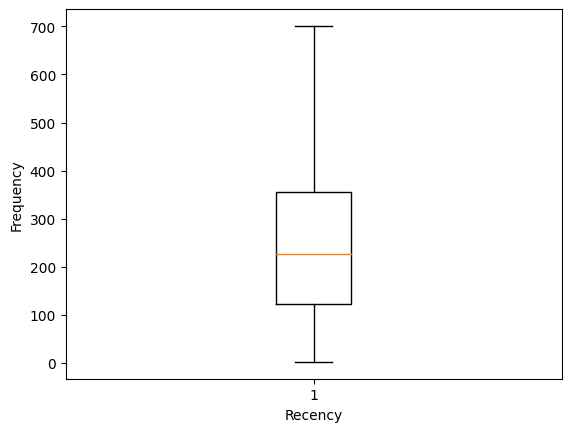

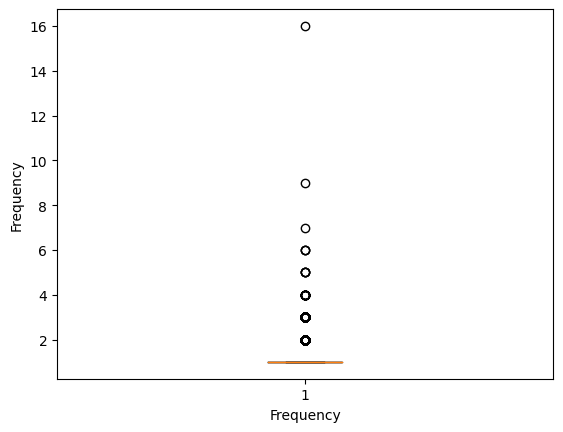

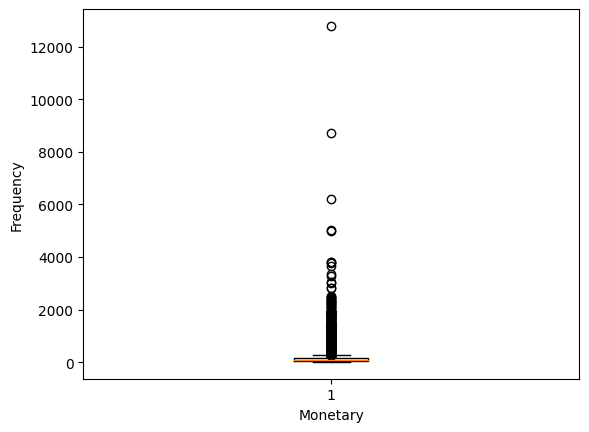

In [86]:
for i in ["Recency", "Frequency", "Monetary"]:
    plt.figure()
    plt.tight_layout()
    plt.gca().set(xlabel= i, ylabel='Frequency')
    plt.boxplot(rfm_df[i])

In [87]:
def num_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.05)
    q3 = df_in[col_name].quantile(0.95)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    outliers_df= df_in.loc[(df_in[col_name] < fence_low) | (df_in[col_name] > fence_high)]
    return print("Number of outliers in {} column: ".format(col_name), len(outliers_df)), print("Indexes: ", outliers_df.index)

In [88]:
for i in ["Recency", "Frequency", "Monetary"]:
    num_outlier(rfm_df, i)
    print("*"*40)

Number of outliers in Recency column:  0
Indexes:  Index([], dtype='int64')
****************************************
Number of outliers in Frequency column:  2257
Indexes:  Index([   85,   118,   207,   259,   345,   357,   398,   428,   465,   491,
       ...
       77789, 77801, 77845, 77916, 77920, 77973, 78007, 78050, 78150, 78248],
      dtype='int64', length=2257)
****************************************
Number of outliers in Monetary column:  641
Indexes:  Index([    7,    21,   169,   188,   193,   307,   319,   523,   526,   636,
       ...
       77299, 77366, 77593, 77738, 77740, 77764, 77855, 78004, 78020, 78086],
      dtype='int64', length=641)
****************************************


In [89]:
rfm_df.shape

(78284, 4)

In [90]:
# hapus outlier
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.05)
    q3 = df_in[col_name].quantile(0.95)
    iqr = q3-q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    index_outliers= df_in.loc[(df_in[col_name] < lower_bound) | (df_in[col_name] > upper_bound)].index
    df_in= pd.DataFrame(df_in.drop(index_outliers.to_list(), axis=0, inplace=True))
    print("Outliers in the {} column have been removed".format(col_name))
    return df_in

In [91]:
for i in ["Recency", "Monetary"]:
    remove_outlier(rfm_df, i)
    print("*"*40)

Outliers in the Recency column have been removed
****************************************
Outliers in the Monetary column have been removed
****************************************


In [92]:
rfm_df.shape

(77643, 4)

In [93]:
rfm_df2= rfm_df.copy()
rfm_df2= rfm_df2.set_index('customer_unique_id')
rfm_df2

,Recency,Frequency,Monetary
customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,117,1,141.90
0000b849f77a49e4a4ce2b2a4ca5be3f,120,1,27.19
0000f46a3911fa3c0805444483337064,543,1,86.22
0000f6ccb0745a6a4b88665a16c9f078,327,1,43.62
0004aac84e0df4da2b147fca70cf8255,294,1,196.89
...,...,...,...
fffbf87b7a1a6fa8b03f081c5f51a201,251,1,167.32
fffea47cd6d3cc0a88bd621562a9d061,268,1,84.58
ffff371b4d645b6ecea244b27531430a,574,1,112.46


In [94]:
rfm_df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Recency,77643.0,246.013330,152.851585,2.00,123.00,227.0,356.00,701.0
Frequency,77643.0,1.029339,0.183528,1.00,1.00,1.0,1.00,6.0
Monetary,77643.0,114.244449,82.902976,9.59,56.78,92.2,148.06,639.9


**Insight:**
- Setelah pengecekan nilai outlier pada data rfm terlihat ada beberapa outlier pada kolom frekuensi dan monetary, sehingga nilai outlier tersebut langsung dihapus.

### Save cleaned RFM data

In [95]:
# Save cleaned RFM data
#rfm_df2.to_csv('/content/drive/MyDrive/Proyek Analisis Data (Dicoding)/cleaned_rfm_df.csv', index=False)

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana performa penjualan dan revenue perusahaan dalam 6 bulan terakhir?

Latest date in dataset:  2018-09-03 09:06:57


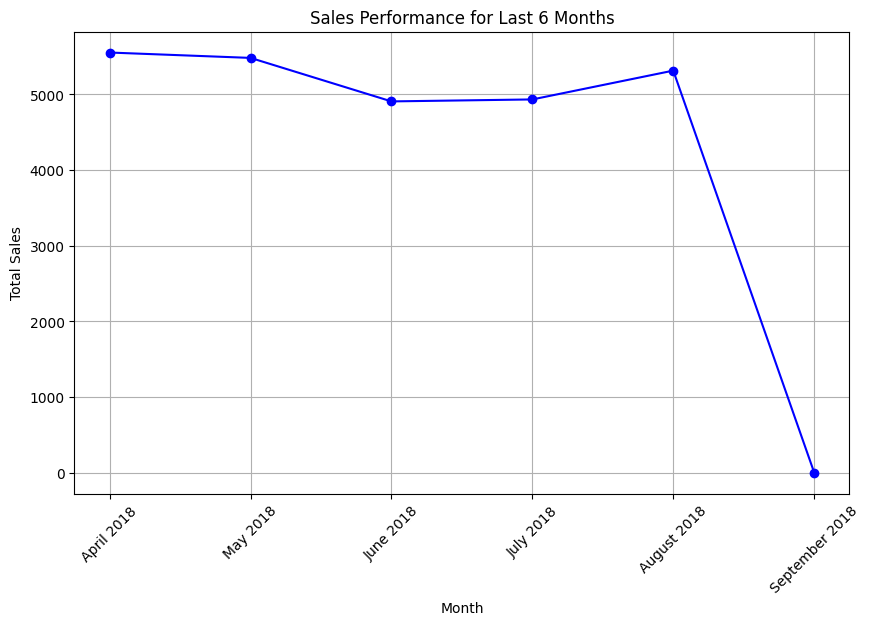

In [96]:
# Konversi ke nama bulan saja menggunakan strftime
monthly_sales['purchase_month_str'] = monthly_sales['purchase_month'].dt.strftime('%B %Y')

# Menampilkan tanggal terakhir di dataset
latest_date = merged_df['order_purchase_timestamp'].max()
print("Latest date in dataset: ", latest_date)
last_6_months= monthly_sales.tail(6)
last_6_months['purchase_month_str'] = last_6_months['purchase_month'].dt.strftime('%B %Y')

# Visualisasi jumlah penjualan per 6 bulan terakhir
plt.figure(figsize=(10,6))
plt.plot(last_6_months['purchase_month_str'].astype(str), last_6_months['total_sales'], marker='o', color='b')
plt.title('Sales Performance for Last 6 Months')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

**Insight:**
- Dari visualisasi tersebut, terlihat bahwa jumlah pesanan paling banyak terjadi pada April 2018. Selain itu, ada penurunan yang cukup besar pada jumlah pesanan di bulan Juni 2018. Namun, pada bulan selanjutnya kembali mengalami peningkatan pesanan. Sedangkan, untuk September 2018, karena data hanya tercatat hingga tanggal 3, maka belum bisa di nilai mengalami penurunan atau tidak.
- Tentunya penurunan tersebut akan berdampak pada total revenue yang diperoleh perusahaan.

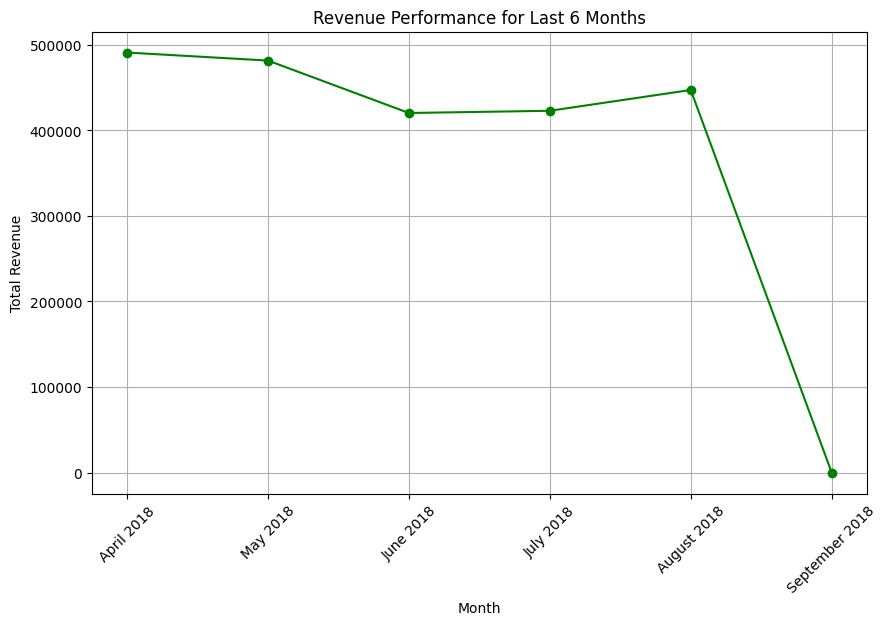

In [97]:
# Visualisasi total revenue per 6 bulan terakhir
plt.figure(figsize=(10,6))
plt.plot(last_6_months['purchase_month_str'].astype(str), last_6_months['total_revenue'], marker='o', color='g')
plt.title('Revenue Performance for Last 6 Months')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

**Insight:**
- Penurunan jumlah orderan yang cukup besar terjadi pada bulan Juni 2018 berdampak terhadap penurunan revenue perusahaan. Sedangkan, untuk September 2018, karena data hanya tercatat hingga tanggal 3, wajar jika jumlah revenue masih sangat sedikit.

### Pertanyaan 2: Produk dengan kategori apa yang paling banyak dan paling sedikit terjual?

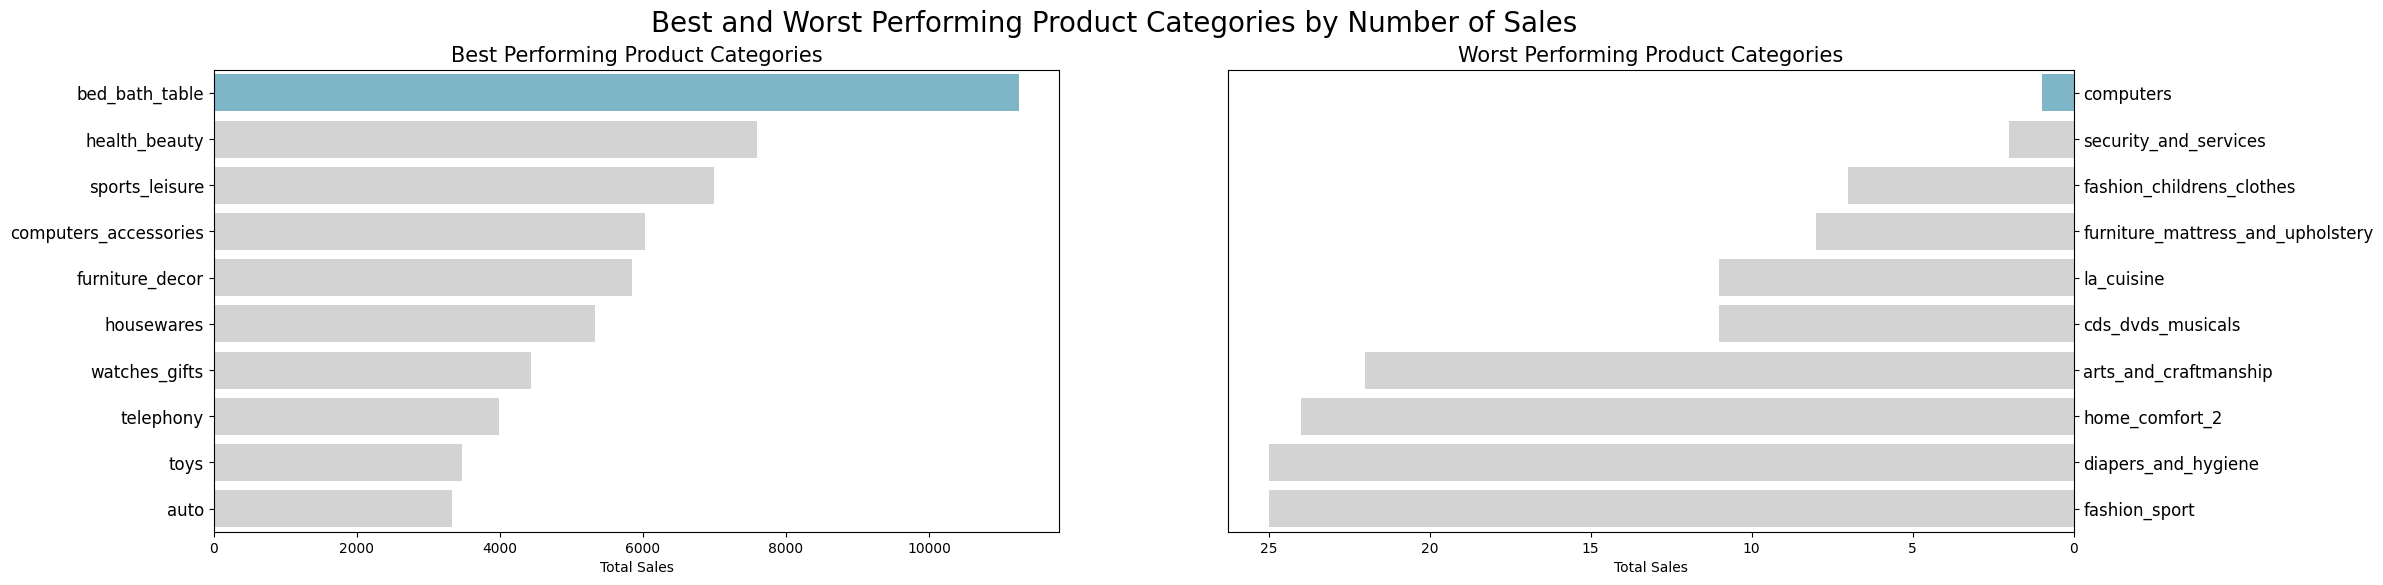

In [98]:
# Visualisasi kategori produk dengan penjualan terbanyak dan tersedikit
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

# Mengatur warna untuk kategori teratas (penjualan terbanyak dan tersedikit)
colors_best = ["#72BCD4"] + ["#D3D3D3"] * 9  # Warna highlight untuk kategori teratas (Best Performing)
colors_worst = ["#72BCD4"] + ["#D3D3D3"] * 9 # Warna highlight untuk kategori terbawah (Worst Performing)

# Visualisasi kategori produk dengan penjualan terbanyak (Top 10)
sns.barplot(x="qty", y="product_category_name_english",
            data=sum_order_items_df.sort_values(by='qty', ascending=False).head(10),
            palette=colors_best, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel('Total Sales')
ax[0].set_title("Best Performing Product Categories", loc="center", fontsize=15)
ax[0].tick_params(axis='y', labelsize=12)

# Visualisasi kategori produk dengan penjualan tersedikit (Bottom 10)
sns.barplot(x="qty", y="product_category_name_english",
            data=sum_order_items_df.sort_values(by="qty", ascending=True).head(10),
            palette=colors_worst, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel('Total Sales')
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Performing Product Categories", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

# Menambahkan judul utama
plt.suptitle("Best and Worst Performing Product Categories by Number of Sales", fontsize=20)

# Menampilkan plot
plt.show()


**Insight:**
- Berdasarkan gambar di atas, dapat kita lihat bahwa produk dengan kategori `beth_bath_table` merupakan kategori produk yang paling laris. Sedangkan produk dengan kategori `computers` yang merupakan kategori produk yang paling sedikit terjual.  

### Pertanyaan 3: Produk dengan kategori apa yang mendapat skor ulasan tertinggi dan terendah?

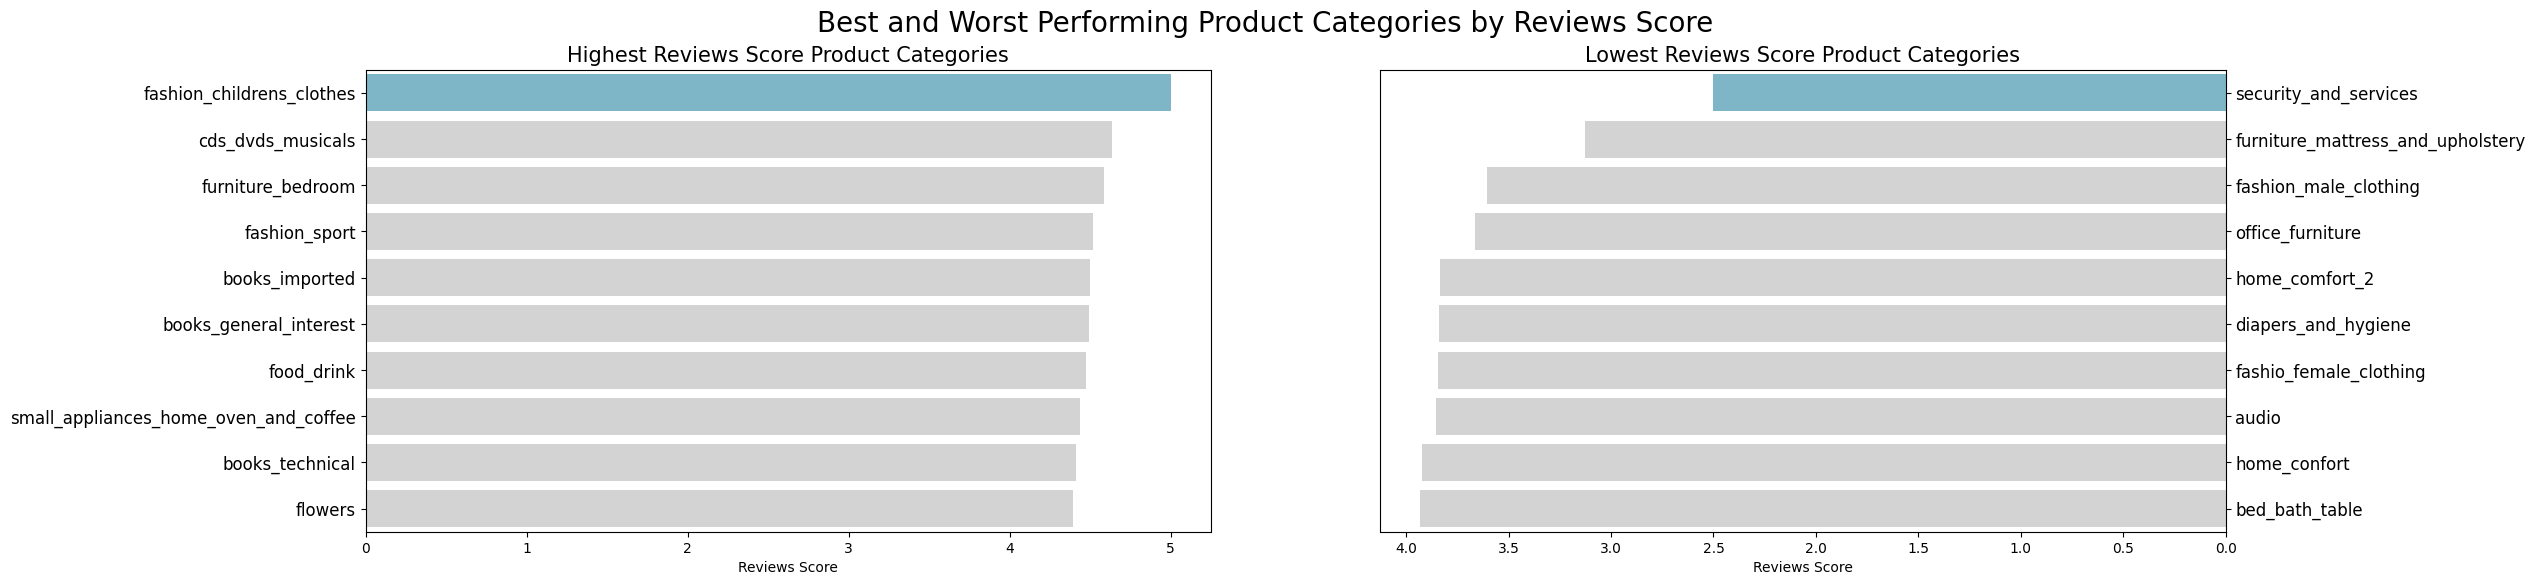

In [99]:
# Visualisasi kategori produk dengan penjualan terbanyak dan tersedikit
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

# Mengatur warna untuk kategori teratas (skor ulasan tertinggi dan terendah)
colors_highest = ["#72BCD4"] + ["#D3D3D3"] * 9  # Warna highlight untuk kategori dengan skor ulasan tertinggi
colors_lowest = ["#72BCD4"] + ["#D3D3D3"] * 9 # Warna highlight untuk kategori dengan skor ulasan terendah

# Visualisasi kategori produk dengan skor ulasan tertinggi (Top 5)
sns.barplot(x="review_score", y="product_category_name_english",
            data=highest_score_category.sort_values(by="review_score", ascending=False).head(10),
            palette=colors_highest, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel('Reviews Score')
ax[0].set_title("Highest Reviews Score Product Categories", loc="center", fontsize=15)
ax[0].tick_params(axis='y', labelsize=12)

# Visualisasi kategori produk dengan skor ulasan terendah (Bottom 5)
sns.barplot(x="review_score", y="product_category_name_english",
            data=lowest_score_category.sort_values(by="review_score", ascending=True).head(10),
            palette=colors_lowest, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel('Reviews Score')
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Lowest Reviews Score Product Categories", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

# Menambahkan judul utama
plt.suptitle("Best and Worst Performing Product Categories by Reviews Score", fontsize=20)

# Menampilkan plot
plt.show()

**Insight:**
- Berdasarkan gambar diatas, dapat kita lihat bahwa kategori produk `fashion_childrens_clothes` memiliki rata-rata skor ulasan tertinggi. Berbeda hal nya dengan kategori produk `security_and_services` yang memiliki rata-rata skor ulasan terendah.

### Pertanyaan 4: Bagaimana distribusi lokasi pelanggan dan penjual?

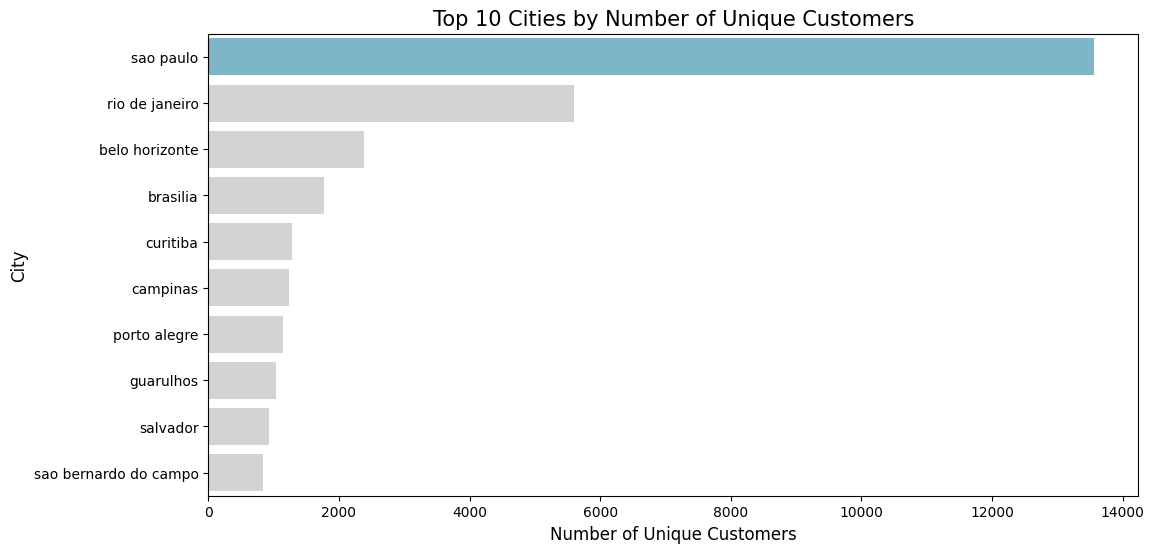

In [100]:
# Menghitung jumlah pelanggan unik per kota
customer_per_city = merged_df.groupby(by='customer_city').customer_id.nunique().sort_values(ascending=False)

# Mengambil top 10 dengan jumlah pelanggan terbanyak
top_cities = customer_per_city.head(10)
colors= ["#72BCD4"] + ['#D3D3D3'] * 9

# Membuat visualisasi
plt.figure(figsize=(12, 6))
sns.barplot(x=top_cities.values, y=top_cities.index, palette=colors)

# Menambahkan label dan judul
plt.xlabel('Number of Unique Customers', fontsize=12)
plt.ylabel('City', fontsize=12)
plt.title('Top 10 Cities by Number of Unique Customers', fontsize=15)

# Menampilkan plot
plt.show()

**Insight:**
- Berdarkan visualisasi data diatas, dapat diketahui bahwa pelanggan paling banyak berasal dari sao paulo.

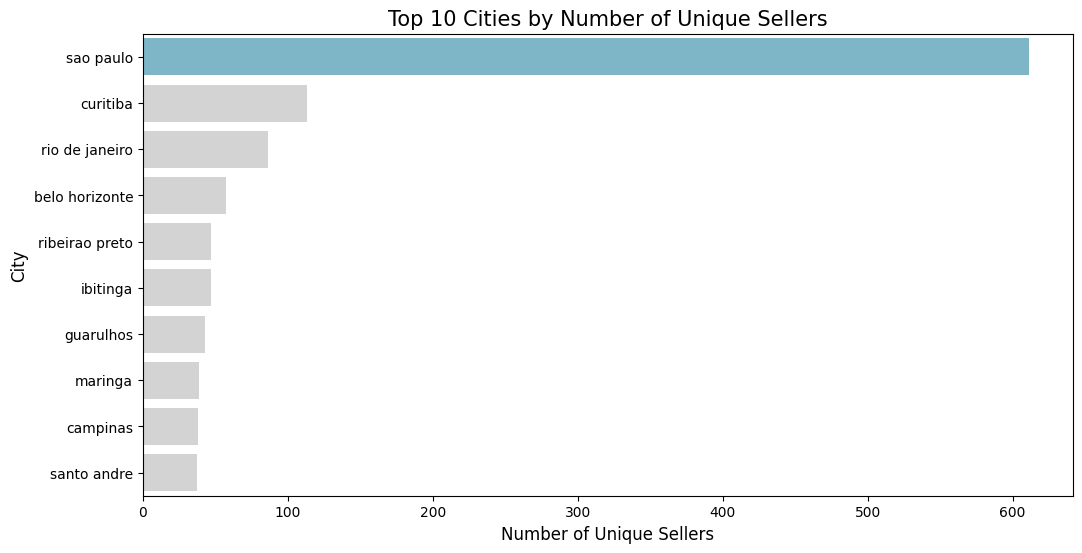

In [101]:
# Menghitung jumlah pelanggan unik per kota
seller_per_city = merged_df.groupby(by='seller_city').seller_id.nunique().sort_values(ascending=False)

# Mengambil top 10 dengan jumlah penjual terbanyak
top_seller_cities = seller_per_city.head(10)
colors= ["#72BCD4"] + ['#D3D3D3'] * 9

# Membuat visualisasi
plt.figure(figsize=(12, 6))
sns.barplot(x=top_seller_cities.values, y=top_seller_cities.index, palette=colors)

# Menambahkan label dan judul
plt.xlabel('Number of Unique Sellers', fontsize=12)
plt.ylabel('City', fontsize=12)
plt.title('Top 10 Cities by Number of Unique Sellers', fontsize=15)

# Menampilkan plot
plt.show()

**Insight:**
- Berdasarkan visualisasi data tersebut, dapat diketahui bahwa penjual paling banyak berasal dari kota sao paulo.

### Pertanyaan 5: Apa metode pembayaran yang paling sering digunakan?

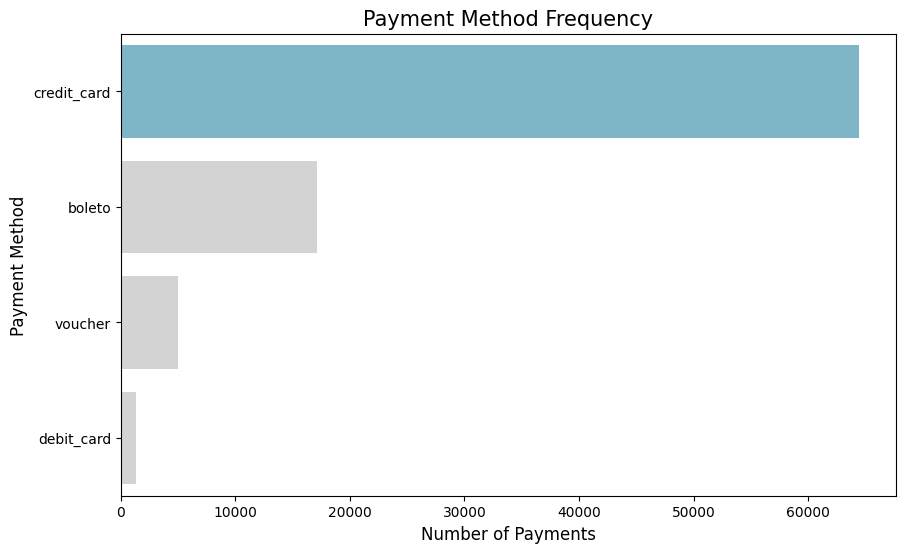

In [102]:
# Membuat plot
plt.figure(figsize=(10, 6))
colors= ["#72BCD4"] + ['#D3D3D3'] * 3
sns.barplot(x='count', y='payment_type', data=payment_counts, palette=colors)

# Menambahkan label dan judul
plt.xlabel('Number of Payments', fontsize=12)
plt.ylabel('Payment Method', fontsize=12)
plt.title('Payment Method Frequency', fontsize=15)

# Menampilkan plot
plt.show()

**Insight:**
- Pembayaran yang sering digunakan dalam pembelian adalah menggunakan credit card

### Pertanyaan 6: Kapan terakhir pelanggan melakukan transaksi?

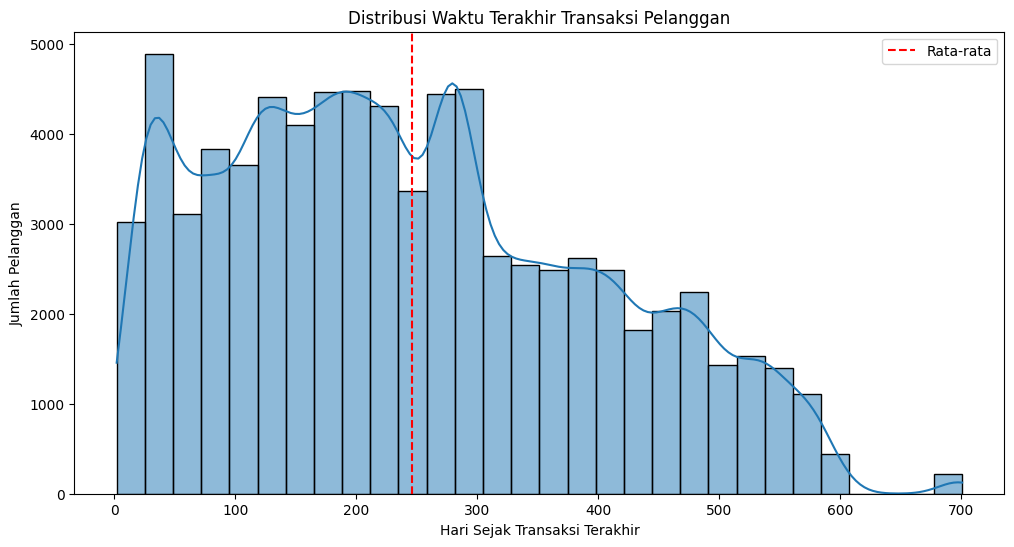

In [103]:
# Visualisasi terakhir pelanggan melakukan transaksi
plt.figure(figsize=(12, 6))
sns.histplot(rfm_df2['Recency'], bins=30, kde=True)
plt.title('Distribusi Waktu Terakhir Transaksi Pelanggan')
plt.xlabel('Hari Sejak Transaksi Terakhir')
plt.ylabel('Jumlah Pelanggan')
plt.axvline(rfm_df2['Recency'].mean(), color='red', linestyle='--', label='Rata-rata')
plt.legend()
plt.show()

**Insight:**
- Berdasarkan visualisasi di atas, rata-rata terakhir pelanggan melakukan transaksi adalah sekitar 250 hari sejak transaksi terakhir.

### Pertanyaan 7: Seberapa sering seorang pelanggan melakukan pembelian dalam beberapa bulan terakhir?

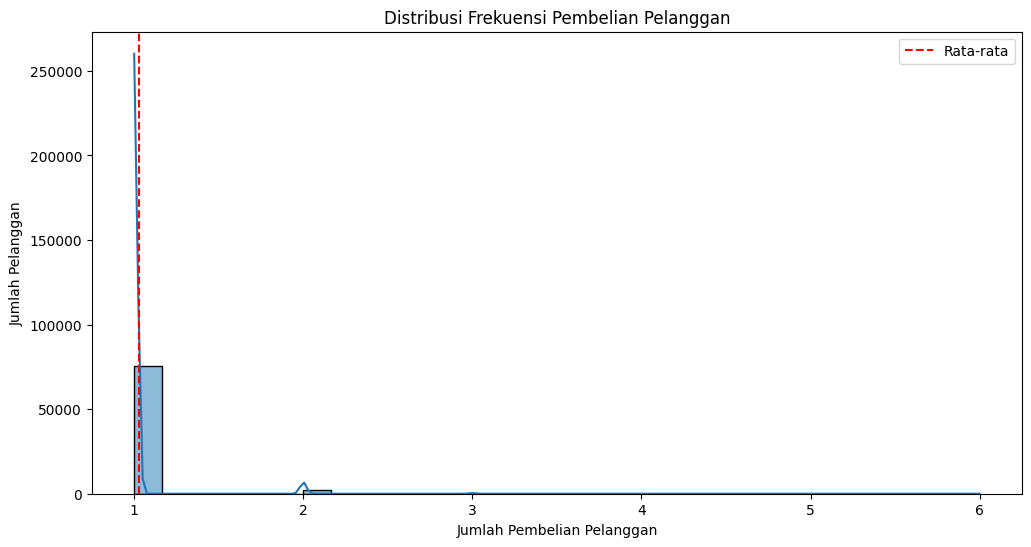

In [104]:
# Visualisasi seberapa sering pelanggan melakukan pembelian
plt.figure(figsize=(12, 6))
sns.histplot(rfm_df2['Frequency'], bins=30, kde=True)
plt.title('Distribusi Frekuensi Pembelian Pelanggan')
plt.xlabel('Jumlah Pembelian Pelanggan')
plt.ylabel('Jumlah Pelanggan')
plt.axvline(rfm_df2['Frequency'].mean(), color='red', linestyle='--', label='Rata-rata')
plt.legend()
plt.show()

**Insight:**
- Berdasarkan gambar di atas, rata-rata pelanggan melakukan 1 kali pembelian.

### Pertanyaan 8: Berapa banyak uang yang dihabiskan pelanggan dalam beberapa bulan terakhir?

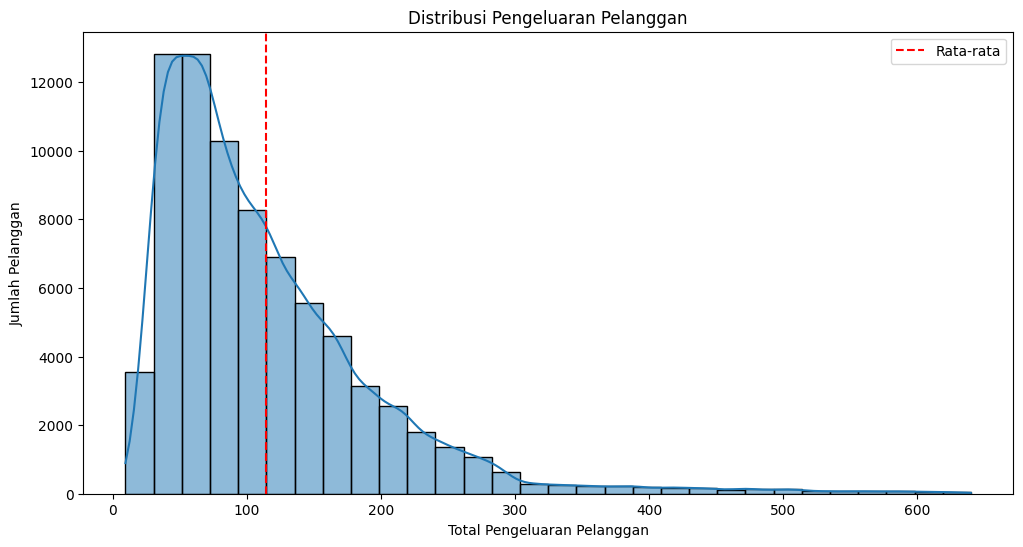

In [105]:
plt.figure(figsize=(12, 6))
sns.histplot(rfm_df2['Monetary'], bins=30, kde=True)
plt.title('Distribusi Pengeluaran Pelanggan')
plt.xlabel('Total Pengeluaran Pelanggan')
plt.ylabel('Jumlah Pelanggan')
plt.axvline(rfm_df2['Monetary'].mean(), color='red', linestyle='--', label='Rata-rata')
plt.legend()
plt.show()

**Insight:**
- Rata-rata uang yang dihabiskan pelanggan adalah lebih kurang dari **R$110**.

## Conclusion

**Pertanyaan 1: Bagaimana performa penjualan dan revenue perusahaan dalam 6 bulan terakhir?** \\
Berdasarkan data penjualan dalam 6 bulan terakhir, performa penjualan perusahaan menunjukkan fluktuasi yang cukup signifikan. Bulan dengan jumlah pesanan tertinggi adalah April 2018, namun di bulan Juni terjadi penurunan pesanan yang cukup besar. Meskipun demikian, jumlah pesanan kembali meningkat di bulan-bulan berikutnya, terutama di bulan Agustus 2018.

Untuk bulan September 2018, karena data hanya tercatat hingga tanggal 3, belum dapat dipastikan apakah terjadi penurunan yang signifikan. Rendahnya jumlah pesanan di bulan tersebut lebih disebabkan oleh keterbatasan data yang ada, bukan karena penurunan performa penjualan.

Secara keseluruhan, penurunan jumlah pesanan pada bulan-bulan tertentu, terutama di bulan Juni, kemungkinan berdampak pada total revenue perusahaan. Bulan dengan jumlah pesanan yang tinggi seperti April dan Agustus berkontribusi besar pada revenue, sementara bulan dengan penurunan pesanan seperti Juni dapat menyebabkan penurunan pendapatan perusahaan.

**Pertanyaan 2: Produk dengan kategori apa yang paling banyak dan paling sedikit terjual?** \\
Berdasarkan analisis data penjualan, produk dalam kategori `bed_bath_table` memiliki jumlah penjualan yang jauh lebih tinggi dibandingkan kategori lainnya, menunjukkan bahwa kategori ini sangat diminati oleh pelanggan. Di sisi lain, produk dengan kategori `computers` memiliki jumlah penjualan yang paling rendah, menunjukkan bahwa kategori ini kurang diminati dibandingkan kategori lain.

Dengan demikian, bed_bath_table adalah kategori dengan penjualan tertinggi, sementara computers menjadi kategori dengan penjualan terendah.


**Pertanyaan 3: Produk dengan kategori apa yang mendapat skor ulasan tertinggi dan terendah?** \\
Berdasarkan analisis data penjualan, produk dalam kategori `fashion_childrens_clothes` memiliki rata-rata skor ulasan tertinggi dengan skor 5. Sedangkan produk dalam kategori `security_and_services` memiliki rata-rata skor ulasan terendah dengan skor 2,5.

**Pertanyaan 4: Bagaimana distribusi lokasi pelanggan dan penjual?** \\
Distribusi pelanggan maupun penjual kebanyakan berasal dari kota sao paulo

**Pertanyaan 5: Apa metode pembayaran yang paling sering digunakan?** \\
Metode pembayaran yang paling sering digunakan oleh pelanggan dalam melakukan transaksi yaitu menggunakan metode pembayaran credit card.

**Pertanyaan 6: Kapan terakhir pelanggan melakukan transaksi?** \\
Setelah melakukan RFM Analysis dan memvisualisasikannya, dapat kita simpulkan bahwa rata-rata terakhir pelanggan melakukan transaksi adalah sekitar 250 hari sejak transaksi terakhir.

**Pertanyaan 7: Seberapa sering seorang pelanggan melakukan pembelian?** \\
Setelah melakukan RFM Analysis dan memvisualisasikannya, dapat kita simpulkan bahwa rata-rata pelanggan hanya melakukan 1 kali pembelian.

**Pertanyaan 8: Berapa banyak uang yang dihabiskan pelanggan dalam beberapa bulan terakhir?** \\
Setelah melakukan RFM Analysis dan memvisualisasikannya, dapat kita simpulkan bahwa rata-rata pelanggan mengeluarkan uang lebih kurang dari R$110.